## 6. 피마 인디언 당뇨병 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv("../dataset/diabetes.csv")
print(diabetes_data['Outcome'].value_counts())    # 결과 개수
diabetes_data.head()

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
diabetes_data.info()

# Null값이 없이 int와 float으로만 구성된 것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
from custom_func import get_clf_eval

x = diabetes_data.iloc[:, :-1]  # 피처들 추출
y = diabetes_data.iloc[:, -1]  # 결과 추출

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y) # 데이터 분리

# 로지스틱으로 학습/예측/평가
lr_clf = LogisticRegression(max_iter=5000)
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)   # 예측
pred_proba = lr_clf.predict_proba(x_test)[:, 1] # 1인 확률

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[92  8]
 [23 31]]
정확도: 0.7987, 정밀도: 0.7949, 재현율: 0.5741, F1: 0.6667, AUC: 0.8841


전체 데이터의 65%가 Negative이므로 정확도보다는 재현율 성능에 조금 더 초점을 맞춰 보겠습니다.

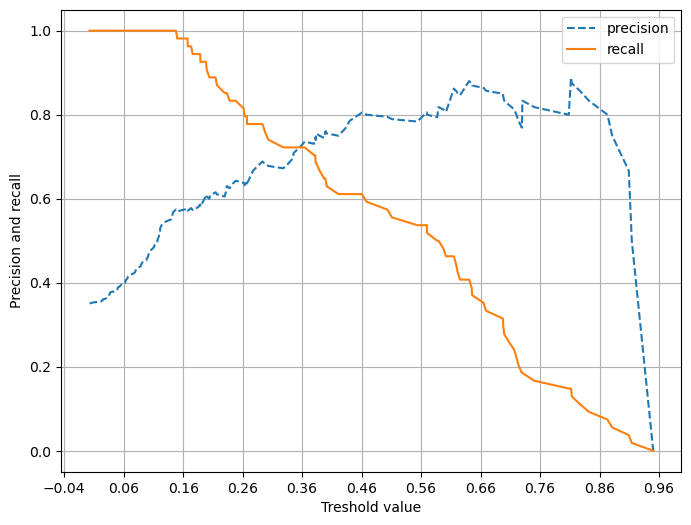

In [4]:
from custom_func import precision_recall_curve_plot, get_clf_eval

precision_recall_curve_plot(y_test, pred_proba)

In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


특성중 min값이 0으로 되어있는 것이 많습니다. 혈압이나 인슐린, 글루코스 등의 값이 죽은 사람이 아니라면 절대 0이 될 수 없습니다. 이 말은 즉슨 Null 값 대신에 0을 사용했다는 뜻 입니다. 이것이 학습을 어렵게 하는 것 같습니다.

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

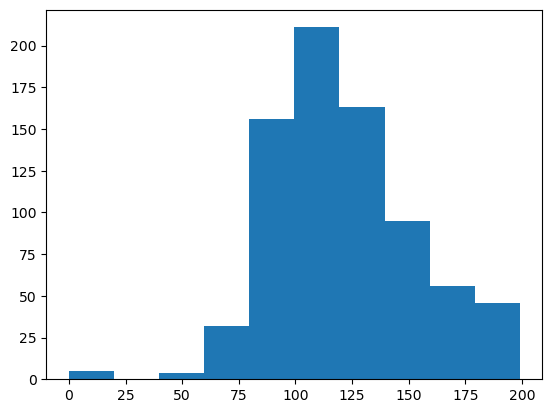

In [6]:
# 히스토그램을 그림
# bins: 데이터를 몇 개의 구간으로 쪼갤지 정함
plt.hist(diabetes_data['Glucose'], bins=10)

In [7]:
# 0의 값을 검사할 피처 이름 (임신 횟수는 제외)
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']

total_count = diabetes_data['Glucose'].count() # 데이터의 개수

# 피처별로 반복
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print("{0} 0 건수는 {1}, 퍼센트는 {2:.4f}%".format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.6510%
BloodPressure 0 건수는 35, 퍼센트는 4.5573%
SkinThickness 0 건수는 227, 퍼센트는 29.5573%
Insulin 0 건수는 374, 퍼센트는 48.6979%
BMI 0 건수는 11, 퍼센트는 1.4323%


In [8]:
# 0이 있는 값들의 평균을 구하기
mean_zero_feature = diabetes_data[zero_features].mean()
print(mean_zero_feature)

# 0 값을 평균으로 대체
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_feature)

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64


In [9]:
# 로지스틱은 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋다
x = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler를 이용하여 스케일링 적용
# 평균 0, 분산 1
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

lr_clf = LogisticRegression(max_iter=5000)
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1: 0.6392, AUC: 0.8370


임계값:  0.3
오차 행렬
[[73 27]
 [13 41]]
정확도: 0.7403, 정밀도: 0.6029, 재현율: 0.7593, F1: 0.6721, AUC: 0.8370

임계값:  0.33
오차 행렬
[[74 26]
 [15 39]]
정확도: 0.7338, 정밀도: 0.6000, 재현율: 0.7222, F1: 0.6555, AUC: 0.8370

임계값:  0.36
오차 행렬
[[75 25]
 [16 38]]
정확도: 0.7338, 정밀도: 0.6032, 재현율: 0.7037, F1: 0.6496, AUC: 0.8370

임계값:  0.39
오차 행렬
[[79 21]
 [19 35]]
정확도: 0.7403, 정밀도: 0.6250, 재현율: 0.6481, F1: 0.6364, AUC: 0.8370

임계값:  0.42
오차 행렬
[[81 19]
 [20 34]]
정확도: 0.7468, 정밀도: 0.6415, 재현율: 0.6296, F1: 0.6355, AUC: 0.8370

임계값:  0.45
오차 행렬
[[84 16]
 [22 32]]
정확도: 0.7532, 정밀도: 0.6667, 재현율: 0.5926, F1: 0.6275, AUC: 0.8370

임계값:  0.48
오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC: 0.8370

임계값:  0.5
오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1: 0.6392, AUC: 0.8370



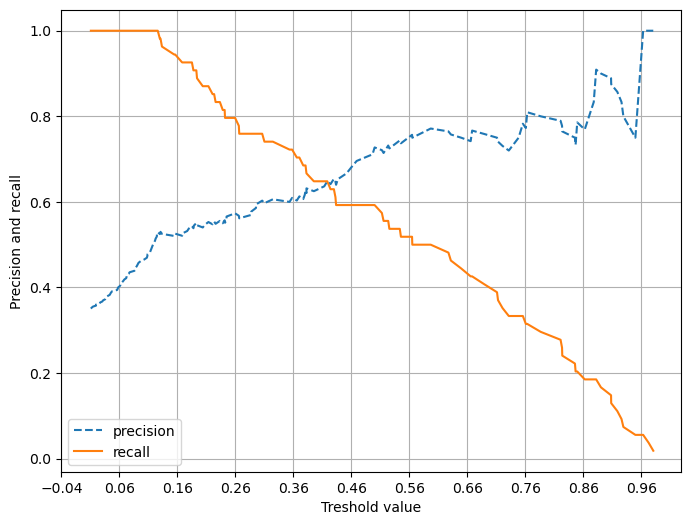

In [10]:
from custom_func import get_eval_by_threshold

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba, thresholds)

In [11]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.48)
pred_proba_re = pred_proba[:, 1].reshape(-1, 1)
pred_th_048 = binarizer.fit_transform((pred_proba[:, 1].reshape(-1, 1)))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC: 0.8370
